# Authors:
## Matthias Bartolo                                           Id: 0436103L
## Jerome Agius                                               Id: 0353803L

# Group Project ICS2205 Web Intelligence

## Task 1: Graph Analysis

#### Packages Install

In [1]:
#Removing the old installation
! pip uninstall -y networkx-neo4j 

#Installing new package
! pip install git+https://github.com/ybaktir/networkx-neo4j 

Found existing installation: networkx-neo4j 0.0.3
Uninstalling networkx-neo4j-0.0.3:
  Successfully uninstalled networkx-neo4j-0.0.3
  Cloning https://github.com/ybaktir/networkx-neo4j to c:\users\user\appdata\local\temp\pip-req-build-6cxdzq5i
  Resolved https://github.com/ybaktir/networkx-neo4j to commit 97dc9563bf992ea9714cbdb99cb9e6a41c7cce65
  Created wheel for networkx-neo4j: filename=networkx_neo4j-0.0.3-py3-none-any.whl size=13787 sha256=ba5406a376b5bbc20b3b203f41cd897102fe62181300feb8795bd593ea14582d
  Stored in directory: C:\Users\User\AppData\Local\Temp\pip-ephem-wheel-cache-2ykxu1m1\wheels\2d\b5\b3\16aa7b50037368b08214f6295804dfee8e1db866ccb4bc0350
Successfully built networkx-neo4j


  Running command git clone -q https://github.com/ybaktir/networkx-neo4j 'C:\Users\User\AppData\Local\Temp\pip-req-build-6cxdzq5i'


#### Packages

In [2]:
import json
import os
from datetime import timedelta
import networkx as nx
import matplotlib.pyplot as plt
from neo4j import GraphDatabase, basic_auth
import string
import numpy as np

### 1. Creating the passing network from the StatsBomb dataset for specific matches that are part of a particular competition of your choice (Total marks: 30)

### 1.1. Parse the competition files to get the list of competitions (e.g. Champions League etc) and then for a particular competition get the relevant matches for a specific season. (5 marks)



#### The following Function will be used extensively, throughout this notebook:
#### Function is used to load and parse a JSON file

In [3]:
#Function which loads the json file, given a file name
def GetJSONFiles(fileName):
    #Try exception used as error handling if file is not found
    try:
        #Opening the JSON file
        file=open(fileName, encoding="utf8")
    except FileNotFoundError:
        #Respective error shown
        print("File Not Found Error")
        #Closing file
        file.close()
    else:
        #Parsing through file and saving contents in variable
        data = json.load(file)

        #Closing file
        file.close()
        
        #Returning file data
        return data

In [4]:
#Loading competition json files, through the use of the GetJsonFiles Function
competitions=GetJSONFiles("open-data-master/data/competitions.json")

#### Displaying list of competitions, as a menu to the user, and proper validation of user input for Competition_id

In [5]:
#uniqueCompetitionid array being used to hold the unique competition ids, as to not show duplicate competitions
uniquecompetitionid=[]
#Looping through the competitions dictionary, and displaying the competition id and competition name
print("Competition Id: \t Competition Name:")
for competition in competitions:
    #Checking if current competition id is not in uniquecompetitionid, if not it will proceed to print information about the competition,
    #and add the current competition to the uniqueCompetitionid array
    if competition["competition_id"] not in uniquecompetitionid:
        print(competition["competition_id"],"\t\t\t",competition["competition_name"])
        uniquecompetitionid.append(competition["competition_id"])
        
#User input for competition_id
competition_id=-1
#Looping until a valid competition id is entered, a valid competition id pertains to any value in the
#uniquecompetitionid array
while competition_id not in uniquecompetitionid:
    competition_id=int(input("Input Competition Id\n"))

Competition Id: 	 Competition Name:
16 			 Champions League
37 			 FA Women's Super League
43 			 FIFA World Cup
1238 			 Indian Super league
11 			 La Liga
49 			 NWSL
2 			 Premier League
55 			 UEFA Euro
53 			 UEFA Women's Euro
72 			 Women's World Cup
Input Competition Id
16


#### Displaying list of seasons, as a menu to the user, and proper validation of user input for Season_id

In [6]:
#uniqueseasonid array being used to only hold the unique season ids
uniqueseasonid=[]
#Looping through the competitions dictionary, and displaying the season id and season date
print("Season Id: \t Season Date:")
for competition in competitions:
    #Checking if the competition id inputted previously by the user matches the current competition id and checking whether the 
    #current season id is not in uniqueseasonid, if not it will proceed to print the information about the season,
    #and add the season to the uniqueseasonid array
    if competition["competition_id"]==competition_id and competition["season_id"] not in uniqueseasonid:
        print(competition["season_id"],"\t\t\t",competition["season_name"])
        uniqueseasonid.append(competition["season_id"])
        
#User input for season_id
season_id=-1
#Looping until a valid season id is entered, a valid season id pertains to any value in the
#uniqueseasonid array
while season_id not in uniqueseasonid:
    season_id=int(input("Input Season Id\n"))

Season Id: 	 Season Date:
4 			 2018/2019
1 			 2017/2018
2 			 2016/2017
27 			 2015/2016
26 			 2014/2015
25 			 2013/2014
24 			 2012/2013
23 			 2011/2012
22 			 2010/2011
21 			 2009/2010
41 			 2008/2009
39 			 2006/2007
37 			 2004/2005
44 			 2003/2004
76 			 1999/2000
Input Season Id
4


#### Retrieving relevant matches from the given competition_id and season_id

#### Displaying list of matches, as a menu to the user, and proper validation of user input for Match_id

In [7]:
#Retrieving relevant matches given a competition_id and season_id, by constructing the path of the required matches file
fileName="open-data-master/data/matches/"+str(competition_id)+"/"+str(season_id)+".json"
matches=GetJSONFiles(fileName)

In [8]:
#uniquematchid array being used to only hold the unique match ids
uniquematchid=[]
#Looping through the matches list, and displaying the match id and match date
print("Match Id: \t\t\t Match Date:")
for match in matches:
    #Checking if the current match id is not in uniquematchid, if not it will proceed to print information about the match,
    #and add the current match to the uniquematchid array
    if match["match_id"] not in uniquematchid:
        print(match["match_id"],"\t\t\t",match["match_date"])
        uniquematchid.append(match["match_id"])


#User input for match_id
match_id=-1
#Looping until a valid match id is entered, a valid match id pertains to any value in the
#uniquematchid array
while match_id not in uniquematchid:
    match_id=int(input("Input Match Id\n"))
    

Match Id: 			 Match Date:
22912 			 2019-06-01
Input Match Id
22912


#### Retrieving all the information for the given match_id, and storing it in a variable

In [9]:
#Required match variable to hold the contents of the required match
requiredmatch=[]
#Looping through all the matches in the matches array
for match in matches:
    #Intialising requiredmatch variable, if current match id matches user inputted match id, and breaking from the loop
    if match["match_id"]== match_id:
        requiredmatch=match
        break

### 1.2. From the match id you will need to load the events details for that match, including the lineup for each team and then generate the passing networks. (20 marks) 
#### To do this you need to:
#### 1.2 a)  Extract the lineup for each team;


In [10]:
#Dictionary to hold all the players in the lineups
playerdetails={}
#Retrieving relevant lineup given a match_id, by constructing the path of the required lineup file
teamlineup=GetJSONFiles("open-data-master/data/lineups/"+str(match_id)+".json")

#Displaying Match and match date
print("Match: ",requiredmatch["match_date"])
#Looping through all the teams in the team lineup
for team in teamlineup:
    #Displaying the current team name
    print("Team: ",team["team_name"],"\n")
    #Looping through all the players in the team, and printing the player name, as well as storing said player in the dictionary
    for player in team["lineup"]:
        print(player["player_name"])
        playerdetails[player["player_id"]]=player
    print("\n")

Match:  2019-06-01
Team:  Tottenham Hotspur 

Christian Dannemann Eriksen
Jan Vertonghen
Harry Winks
Heung-Min Son
Moussa Sissoko
Bamidele Alli
Hugo Lloris
Kieran Trippier
Fernando Llorente Torres
Danny Rose
Lucas Rodrigues Moura da Silva
Harry Kane
Eric Dier
Toby Alderweireld


Team:  Liverpool 

Fábio Henrique Tavares
James Philip Milner
Joe Gomez
Joël Andre Job Matip
Mohamed Salah
Jordan Brian Henderson
Roberto Firmino Barbosa de Oliveira
Georginio Wijnaldum
Sadio Mané
Andrew Robertson
Trent Alexander-Arnold
Virgil van Dijk
Divock Okoth Origi
Alisson Ramsés Becker




#### 1.2 b)  Then filter the data to extract the passes;


In [11]:
#Retrieving relevant events given a match_id, by constructing the path of the required events file
eventsfile=GetJSONFiles("open-data-master/data/events/"+str(match_id)+".json")
#Dictionary to hold the events which are passed
eventpasses={}

#Looping through all the events in the eventsfile
for event in eventsfile:
    #Checking if the event is a pass, and that the event has a recipient, if so it will enter the if statement
    if event["type"]["name"]=="Pass" :
        if "recipient" in event["pass"].keys():
            #Printing the player A passed to player B, and storing in dictionary if it isn't in dictionary, else
            #it will increment the element in the eventpasses dictionary, to record the frequnecy of player A passing to player B
            print(event["player"]["name"],"  passed to:  "+event["pass"]["recipient"]["name"])
            if (str(event["player"]["name"])+","+str(event["pass"]["recipient"]["name"])) not in eventpasses.keys():
                eventpasses[str(event["player"]["name"])+","+str(event["pass"]["recipient"]["name"])]=1
            else:
                eventpasses[str(event["player"]["name"])+","+str(event["pass"]["recipient"]["name"])]+=1

Jordan Brian Henderson   passed to:  Joël Andre Job Matip
Joël Andre Job Matip   passed to:  Sadio Mané
Kieran Trippier   passed to:  Harry Kane
Fábio Henrique Tavares   passed to:  Roberto Firmino Barbosa de Oliveira
Moussa Sissoko   passed to:  Harry Winks
Jordan Brian Henderson   passed to:  Sadio Mané
Toby Alderweireld   passed to:  Harry Kane
Virgil van Dijk   passed to:  Georginio Wijnaldum
Georginio Wijnaldum   passed to:  Jordan Brian Henderson
Jordan Brian Henderson   passed to:  Sadio Mané
Sadio Mané   passed to:  Jordan Brian Henderson
Harry Kane   passed to:  Bamidele Alli
Christian Dannemann Eriksen   passed to:  Harry Kane
Andrew Robertson   passed to:  Roberto Firmino Barbosa de Oliveira
Toby Alderweireld   passed to:  Bamidele Alli
Fábio Henrique Tavares   passed to:  Mohamed Salah
Jan Vertonghen   passed to:  Bamidele Alli
Fábio Henrique Tavares   passed to:  Sadio Mané
Kieran Trippier   passed to:  Harry Winks
Harry Winks   passed to:  Bamidele Alli
Bamidele Alli   pa

#### 1.2 c)  Get the number of times that some player A passes the ball to some player B;


In [12]:
#Looping through all the contents of the eventpasses dictionary, and printing player names, and pass frequency
for passes in eventpasses.keys():
    playerids=passes.split(",")
    print(playerids[0],"  passed to:  "+playerids[1]+"  "+str(eventpasses[passes])+" time/s")

Jordan Brian Henderson   passed to:  Joël Andre Job Matip  2 time/s
Joël Andre Job Matip   passed to:  Sadio Mané  3 time/s
Kieran Trippier   passed to:  Harry Kane  10 time/s
Fábio Henrique Tavares   passed to:  Roberto Firmino Barbosa de Oliveira  4 time/s
Moussa Sissoko   passed to:  Harry Winks  6 time/s
Jordan Brian Henderson   passed to:  Sadio Mané  5 time/s
Toby Alderweireld   passed to:  Harry Kane  4 time/s
Virgil van Dijk   passed to:  Georginio Wijnaldum  3 time/s
Georginio Wijnaldum   passed to:  Jordan Brian Henderson  2 time/s
Sadio Mané   passed to:  Jordan Brian Henderson  2 time/s
Harry Kane   passed to:  Bamidele Alli  3 time/s
Christian Dannemann Eriksen   passed to:  Harry Kane  7 time/s
Andrew Robertson   passed to:  Roberto Firmino Barbosa de Oliveira  9 time/s
Toby Alderweireld   passed to:  Bamidele Alli  4 time/s
Fábio Henrique Tavares   passed to:  Mohamed Salah  2 time/s
Jan Vertonghen   passed to:  Bamidele Alli  3 time/s
Fábio Henrique Tavares   passed to:

#### 1.2 d)  Retrieve the top 11 players for each team based on the playing minutes (since players might be substituted during the game);


#### For this method, it is assumed, that the total match time is 90 minutes

#### Calculating time each player has played

In [13]:
#List which holds the player time, for every team
teamplayerTime=[]
#List from previous method which holds teamlineup
teamlineup
#List to hold the team names
teamNames=[]

#Looping through all the teams in the teamlineup
for team in teamlineup:
    #Appending team name to teamNames array
    teamNames.append(team["team_name"])
    #Dictionary, which hold, the playerTime for each player
    playerTime={}
    #Looping through all the players in the team
    for player in team["lineup"]:
        #Looping through all the positions, a player has
        for positions in player["positions"]:
            #Calculating the time a player has played in the game, via string split, to parse the time in integer, and
            #utilising timedeltatime to calculate the total time a player has played
            #If statement to check that starting time and ending time are not null
            if positions["from"]!=None and positions["to"]!=None:
                sTime=positions["from"].split(":")
                eTime=positions["to"].split(":")
                startTime = timedelta(minutes=int(sTime[0]), seconds=int(sTime[1]))
                endTime = timedelta(minutes=int(eTime[0]), seconds=int(eTime[1]))
                #If statment to check if player is already in playerTime dict, 
                #if yes the player time is appended otherwise a new entry is added
                if(player["player_name"] not in playerTime.keys()):
                    playerTime[player["player_name"]] = timedelta(minutes=0, seconds=0);
                playerTime[player["player_name"]]+=endTime-startTime
                
            #If statement to check that starting time is null, but not ending time  
            elif positions["to"]==None and positions["from"]!=None:
                sTime=positions["from"].split(":")
                eTime="90:00".split(":")
                startTime = timedelta(minutes=int(sTime[0]), seconds=int(sTime[1]))
                endTime = timedelta(minutes=int(eTime[0]), seconds=int(eTime[1]))
                #If statment to check if player is already in playerTime dict, 
                #if yes the player time is appended otherwise a new entry is added
                if(player["player_name"] not in playerTime.keys()):
                    playerTime[player["player_name"]] = timedelta(minutes=0, seconds=0);
                playerTime[player["player_name"]]+=endTime-startTime
            
            #If statement to check that starting time and ending time are null
            elif positions["to"]==None and positions["from"]==None:
                startTime = timedelta(minutes=0, seconds=0)
                endTime = timedelta(minutes=0, seconds=0)
                #If statment to check if player is already in playerTime dict, 
                #if yes the player time is appended otherwise a new entry is added
                if(player["player_name"] not in playerTime.keys()):
                    playerTime[player["player_name"]] = timedelta(minutes=0, seconds=0);
                playerTime[player["player_name"]]+=endTime-startTime
    #Appending to list           
    teamplayerTime.append(playerTime)

#### Sorting the player times, to obtain the top 11 players

In [14]:
#List which will hold the sorted team time
sortedTeamTime=[]
#list which will hold the top 11 player names for both team
sortedPlayerNames=[]
#Looping through all the teams, and sorting the list by time, appending result to sortedTeamTime list
for team in teamplayerTime:
    sortedTeamTime.append({Key: Value for Key, Value in sorted(team.items(), key=lambda item: item[1], reverse=True)})

#Counter will be used as an index for team names  
count=0
#Looping through all the teams in the sortedTeamTime list
for team in sortedTeamTime:
    #Printing team name
    print("Team: ",teamNames[count]," top 11 players:\n")
    #player count which will be used to only show, the top 11 players
    playercount=0
    #list which will hold the top 11 player names for one team
    playerNameTeam=[]
    #Looping through all the players
    for player in team.keys():
        #If playercounr>10 , then break from loop
        if playercount>10:
            break
        #Print statement
        print(player+"  has played for: "+str(team[player])+" hours")
        #Appending player to playerNameTeam
        playerNameTeam.append(player)
        #Incrementing player count
        playercount+=1
    #Appending to sortedPlayerNames list
    sortedPlayerNames.append(playerNameTeam)   
    print("\n")
    #Incrementing counter
    count+=1

Team:  Tottenham Hotspur  top 11 players:

Christian Dannemann Eriksen  has played for: 1:30:00 hours
Jan Vertonghen  has played for: 1:30:00 hours
Heung-Min Son  has played for: 1:30:00 hours
Hugo Lloris  has played for: 1:30:00 hours
Kieran Trippier  has played for: 1:30:00 hours
Danny Rose  has played for: 1:30:00 hours
Harry Kane  has played for: 1:30:00 hours
Toby Alderweireld  has played for: 1:30:00 hours
Bamidele Alli  has played for: 1:21:17 hours
Moussa Sissoko  has played for: 1:13:31 hours
Harry Winks  has played for: 1:05:12 hours


Team:  Liverpool  top 11 players:

Fábio Henrique Tavares  has played for: 1:30:00 hours
Joël Andre Job Matip  has played for: 1:30:00 hours
Mohamed Salah  has played for: 1:30:00 hours
Jordan Brian Henderson  has played for: 1:30:00 hours
Andrew Robertson  has played for: 1:30:00 hours
Trent Alexander-Arnold  has played for: 1:30:00 hours
Virgil van Dijk  has played for: 1:30:00 hours
Alisson Ramsés Becker  has played for: 1:30:00 hours
Sadio 

#### 1.2 e)  Generate and plot the passing network using networkX4. 

#### Generating passing network graph of the first team

Tottenham Hotspur


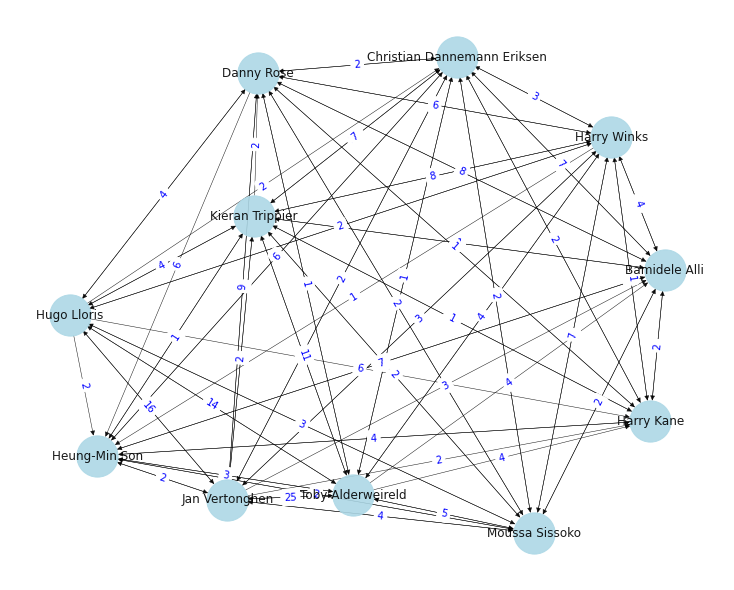

In [15]:
#Printing teamName
print(teamNames[0])
#Creating Graph
graph1 = nx.DiGraph(name=("Passing Network"+str(teamNames[0])))
#Declaring vairable which will hold the edgelabels
edge_labels1={}
#Looping through all the passes in the eventpasses dictionary
for passes in eventpasses.keys():
    playerids=passes.split(",")
    #Creating edges between player on the graph, and saving number of passes in edgelabels1
    if playerids[0] in sortedPlayerNames[0] and playerids[1] in sortedPlayerNames[0]:
        graph1.add_edge(playerids[0], playerids[1],weight=eventpasses[passes])
        edge_labels1[(str(playerids[0]),str(playerids[1]))]=str(eventpasses[passes])

#Setting plot size
plt.figure(figsize=(10,8))   
#Setting graph configurations:
pos1=nx.spring_layout(graph1, k=7, iterations=77)
options = {"node_color":"lightblue","node_size":1700,"edge_color":"black","width": .50,"alpha": .9}
#Drawing graph
nx.draw(graph1,pos = pos1, with_labels = True, **options)
#Drawing edge labels
output=nx.draw_networkx_edge_labels(graph1,pos = pos1,edge_labels=edge_labels1,font_color="blue")

#### Generating passing network graph of the second team

Liverpool


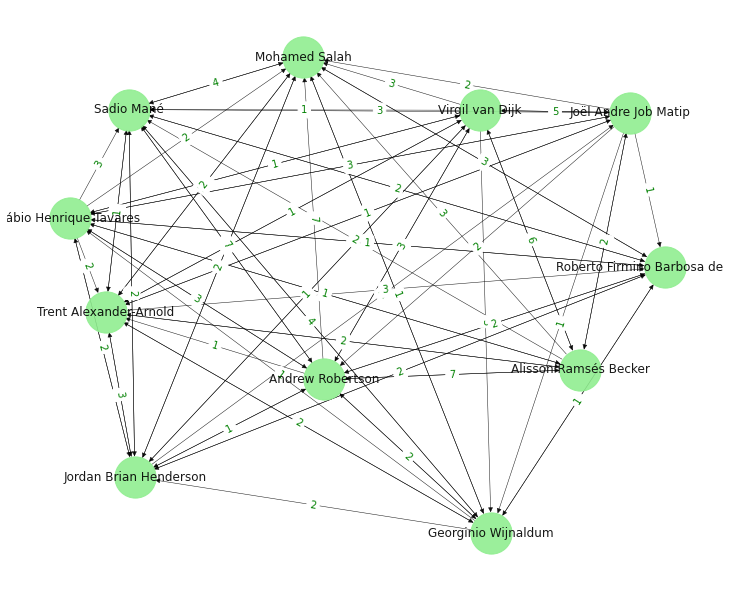

In [16]:
#Printing teamName
print(teamNames[1])
#Creating Graph
graph2 = nx.DiGraph(name=("Passing Network"+str(teamNames[1])))
#Declaring vairable which will hold the edgelabels
edge_labels2={}
#Looping through all the passes in the eventpasses dictionary
for passes in eventpasses.keys():
    playerids=passes.split(",")
    #Creating edges between player on the graph, and saving number of passes in edgelabels2
    if playerids[0] in sortedPlayerNames[1] and playerids[1] in sortedPlayerNames[1]:
        graph2.add_edge(playerids[0], playerids[1],weight=eventpasses[passes])
        edge_labels2[(str(playerids[0]),str(playerids[1]))]=str(eventpasses[passes])

#Setting plot size
plt.figure(figsize=(10,8))   
#Setting graph configurations:
pos1=nx.spring_layout(graph2, k=7, iterations=77)
options = {"node_color":"lightgreen","node_size":1700,"edge_color":"black","width": .50,"alpha": .9}
#Drawing graph
nx.draw(graph2,pos = pos1, with_labels = True, **options)
#Drawing edge labels
output=nx.draw_networkx_edge_labels(graph2,pos = pos1,edge_labels=edge_labels2,font_color="green")

### 1.3. Finally store the passing network for that match in Neo4j Desktop5. It is recommended that you use libraries such as nxneo4j6 or py2neo7 to interface with Neo4j.(5 marks)

#### Importing Library nxneo4j, so as to store passing network in neo4j

In [17]:
import nxneo4j

#### Establishing Connection with neo4j

In [18]:
#The settings below need to be changed accordingly depending on the user s
user='neo4j'
url='bolt://localhost:7687'
password='test'
driver = GraphDatabase.driver(url,auth=basic_auth(user,password))

#### Creating graph, and graph configuration

In [20]:
#Graph Configuration
config = {
'node_label': 'Player',
'relationship_type': 'PASSEDTO',
'identifier_property': 'name'
}

#Creating directed graph, and deleting any previous data
Graph = nxneo4j.DiGraph(driver,config=config)
Graph.delete_all()       

#### Appending passing network of team 1 to graph

In [21]:
#Printing team Name
print(teamNames[0])
#Looping through all the passes in the eventspasses dictionary
for passes in eventpasses.keys():
    playerids=passes.split(",")
    #Checking whether player A is in team 1 and player B is in the correct team, if so adding nodes to graph, and edges between the nodes
    if playerids[0] in sortedPlayerNames[0] and playerids[1] in sortedPlayerNames[0]:
        Graph.add_node(playerids[0],team=teamNames[0],teamId = 1)
        Graph.add_node(playerids[1],team=teamNames[0],teamId = 1)
        Graph.add_edge(playerids[0],playerids[1],weight=eventpasses[passes], team=teamNames[0])
        

Tottenham Hotspur


#### Appending passing network of team 2 to graph

In [22]:
#Printing team Name
print(teamNames[1])
#Looping through all the passes in the eventspasses dictionary
for passes in eventpasses.keys():
    playerids=passes.split(",")
    #Checking whether player A is in team 1 and player B is in the correct team, if so adding nodes to graph, and edges between the nodes
    if playerids[0] in sortedPlayerNames[1] and playerids[1] in sortedPlayerNames[1]:
        Graph.add_node(playerids[0],team=teamNames[1], teamId = 2)
        Graph.add_node(playerids[1],team=teamNames[1], teamId = 2)
        Graph.add_edge(playerids[0],playerids[1],weight=eventpasses[passes], team=teamNames[1])
        


Liverpool


#### Given a competion id of 11, season id of 90, and match id of 3773631 we tested to makes sure that the graphs were working with neo4j. This can be seen in the image below.

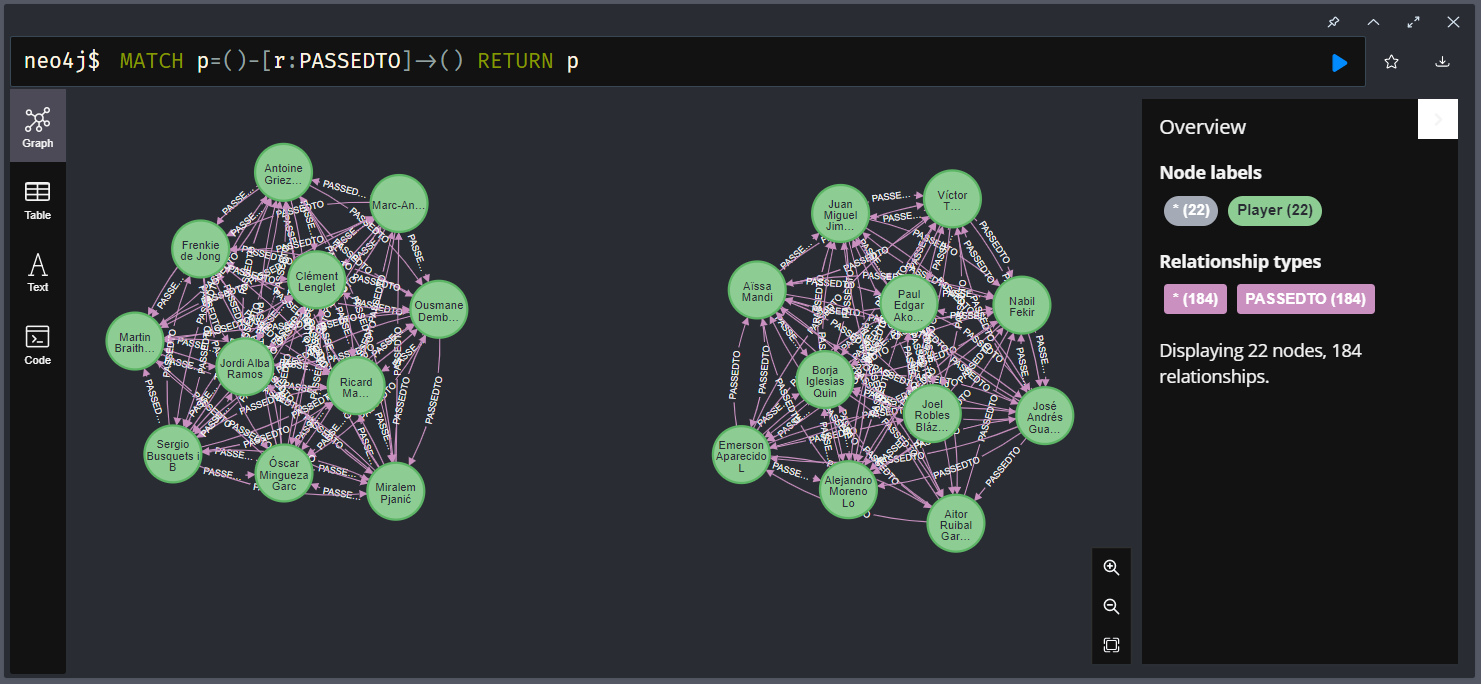

### 2. Analyse the underlying structure of the passing network by computing the following statistics for the passing network for each team using networkX (Total marks: 20):

#### Provide information about any challenges that you might have encountered when computing these statistics, and explain how you solved them.

<u>Challanges Encountered</u>

1. We had to distinguish between the individual teams and as such we resolved said issue by adding the corresponding team labels.

2. In section 2.2 we were initially plotting the graphs according to the player, rather than the degree and this 
was resolved by assigning the xvalues to be the varying degrees instead of player names and working out the distribution accordingly.

#### 2.1 Total number of passes (4 marks)


##### Printing total number of passes for team 1

In [23]:
#Variable which will hold totalPasses
totalPasses1=0
#Looping through all the edges
for edge in edge_labels1.values():
    #Appending edge weight to totalpasses
    totalPasses1+=int(edge)
#Print Statement
print("The total number of passes for "+str(teamNames[0])+" is: ",totalPasses1)

The total number of passes for Tottenham Hotspur is:  494


##### Printing total number of passes for team 2

In [24]:
#Variable which will hold totalPasses
totalPasses2=0
#Looping through all the edges
for edge in edge_labels2.values():
    #Appending edge weight to totalpasses
    totalPasses2+=int(edge)
#Print Statement
print("The total number of passes for "+str(teamNames[1])+" is: ",totalPasses2)

The total number of passes for Liverpool is:  261


#### 2.2 Degree distribution (plot the distribution) (6 marks)


##### Function will be used to calculate and plot the Degree Distribution of an entered, given the dictionary of degrees, and graph

In [25]:
def PlotDegreeDistribution(degree,Graph,title):
    #Calculating max and min degree  
    maxdegree=max([player[1] for player in degree])
    mindegree=min([player[1] for player in degree])
    
    #Finding out vertex degree
    values=range(mindegree,maxdegree+1)
    yvalues=[]
    for v in values:
        count=0
        for index in degree:
            if v==index[1]:
                count+=1
        yvalues.append(count)
    #Normalising
    yvalues = [float(value)/sum(yvalues) for value in yvalues]
    
    #Plotting bars and xlabels
    plt.bar(values, yvalues,0.4,color="lightblue")
    plt.xticks(values, values)
    
    #Printing values on bars
    for i in range(len(values)):
        plt.text(values[i]-0.2,yvalues[i],round(yvalues[i],3))
    
    #Plotting labels and showing graph
    plt.xlabel("Degree")
    plt.ylabel("No of Vertices")
    plt.title("Vertex Degree "+title)
    plt.show()

##### Plotting the Degree distribution of team 1

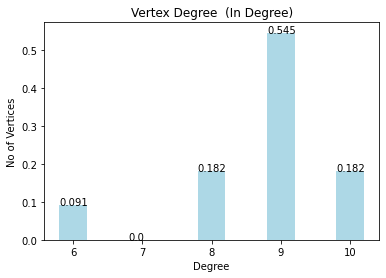

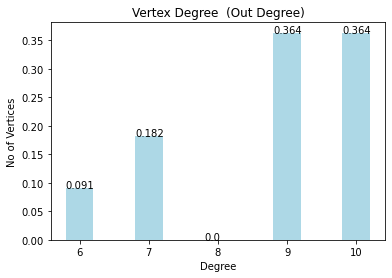

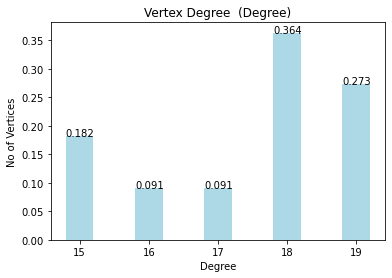

In [26]:
Graph=graph1
#Dictionaries which will hold the indegree, outdegree and degree of graph1
playerindegree=Graph.in_degree(list(Graph.nodes))
playeroutdegree=Graph.out_degree(list(Graph.nodes))
playerdegree=Graph.degree(list(Graph.nodes))
#Displaying respective plots
PlotDegreeDistribution(playerindegree,Graph," (In Degree)")
PlotDegreeDistribution(playeroutdegree,Graph," (Out Degree)")
PlotDegreeDistribution(playerdegree,Graph," (Degree)")

##### Plotting the Degree distribution of team 2

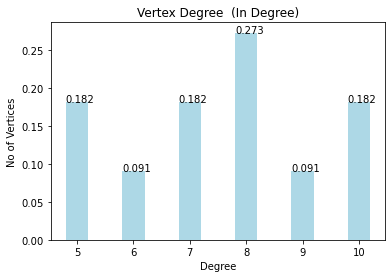

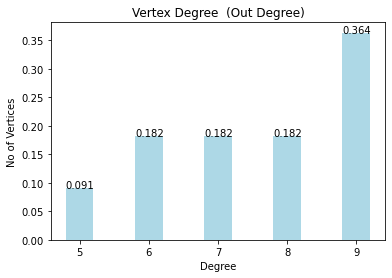

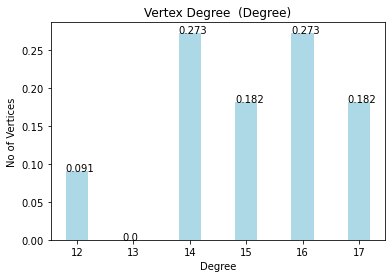

In [27]:
Graph=graph2
#Dictionaries which will hold the indegree, outdegree and degree of graph1
playerindegree=Graph.in_degree(list(Graph.nodes))
playeroutdegree=Graph.out_degree(list(Graph.nodes))
playerdegree=Graph.degree(list(Graph.nodes))
#Displaying respective plots
PlotDegreeDistribution(playerindegree,Graph," (In Degree)")
PlotDegreeDistribution(playeroutdegree,Graph," (Out Degree)")
PlotDegreeDistribution(playerdegree,Graph," (Degree)")

#### 2.3 Average path length (5 marks)


##### Function which Calculated the shortest path for every node in a given graph

In [28]:
def CalculateShortestPath(Graph):
    #Dictionary which holds the sum of the shortest path lengths starting from a specifc node and reaching all other nodes  
    sumShortestPath={}
    
    #Calculating the sum of the shortest paths for each node
    for node1 in Graph.nodes:
        total=0
        for node2 in Graph.nodes:
            #Checking that the nodes are unique 
            if node1!=node2:
                #Adding the distance to the total value
                total+=nx.shortest_path_length(Graph, node1, node2, weight='weight')
        #Storing the new total value
        sumShortestPath[node1]=total
    
    factor=1.0/(len(Graph.nodes)-1)
    #Normalising the values in the dictionary
    sumShortestPath = {k: v*factor for k, v in sumShortestPath.items() }    
    return sumShortestPath

##### Calculating Average path length for team 1

In [29]:
pathlength1=CalculateShortestPath(graph1)
averagepathlength1 = 0

#Looping through the pathlength values and adding them together
for value in pathlength1.values():
    averagepathlength1+=value
    
#Calculating the average path length     
averagepathlength1=averagepathlength1/len(pathlength1)
print("The average path length is: ",averagepathlength1)

The average path length is:  3.145454545454545


##### Calculating Average path length for team 2

In [30]:
pathlength2=CalculateShortestPath(graph2)
averagepathlength2 = 0

#Looping through the pathlength values and adding them together
for value in pathlength2.values():
    averagepathlength2+=value

#Calculating the average path length
averagepathlength2=averagepathlength2/len(pathlength2)
print("The average path length is: ",averagepathlength2)

The average path length is:  2.2545454545454544


#### 2.4 Global clustering coefficient (5 marks)

##### Calculating Global clustering coefficient for team 1

In [31]:
#Calculating global cluster coefficient
globalclusteringcoefficient1=nx.clustering(graph1)
#Calculating average global cluster coefficient
averageglobalclusteringcoefficient1 = sum(globalclusteringcoefficient1.values())/len(graph1.nodes)
#Printing the result
print("The global clustering coefficient of team 1 is: ",averageglobalclusteringcoefficient1)

The global clustering coefficient of team 1 is:  0.873683969135262


##### Calculating Global clustering coefficient for team 2

In [32]:
#Calculating global cluster coefficient
globalclusteringcoefficient2=nx.clustering(graph2)
#Calculating average global cluster coefficient
averageglobalclusteringcoefficient2 = sum(globalclusteringcoefficient2.values())/len(graph2.nodes)
#Printing the result
print("The global clustering coefficient is: ",averageglobalclusteringcoefficient2)

The global clustering coefficient is:  0.7570240790204259


### 3.  Query Neo4j directly using Cypher to answer the following questions regarding each team (Total marks: 40):
#### Include the Cypher queries in the jupyter notebook as markdown. Furthermore, you need to also explain any parameters used and any encountered issues and how these were solved.

<u>Challanges Encountered</u>

No issues were encountered during this section

#### The following images consider the following parameters: a competion id of 11, season id of 90, and match id of 3773631.

#### 3.1 Who is the most active player in terms of passes? (10 marks)

<u>Retrieving the most active player from team one</u>

This is achived by summing the weight of each player in team one, ordering the resultant data in descending order and displaying only one player, that being the player with the highest total passes.

<u>Cypher Query</u>

**MATCH p=(n)-[r:PASSEDTO]->() WHERE n.teamId=1 RETURN n.name,SUM(r.weight) AS totalPasses ORDER BY totalPasses DESC LIMIT 1**

<u>Results:</u>

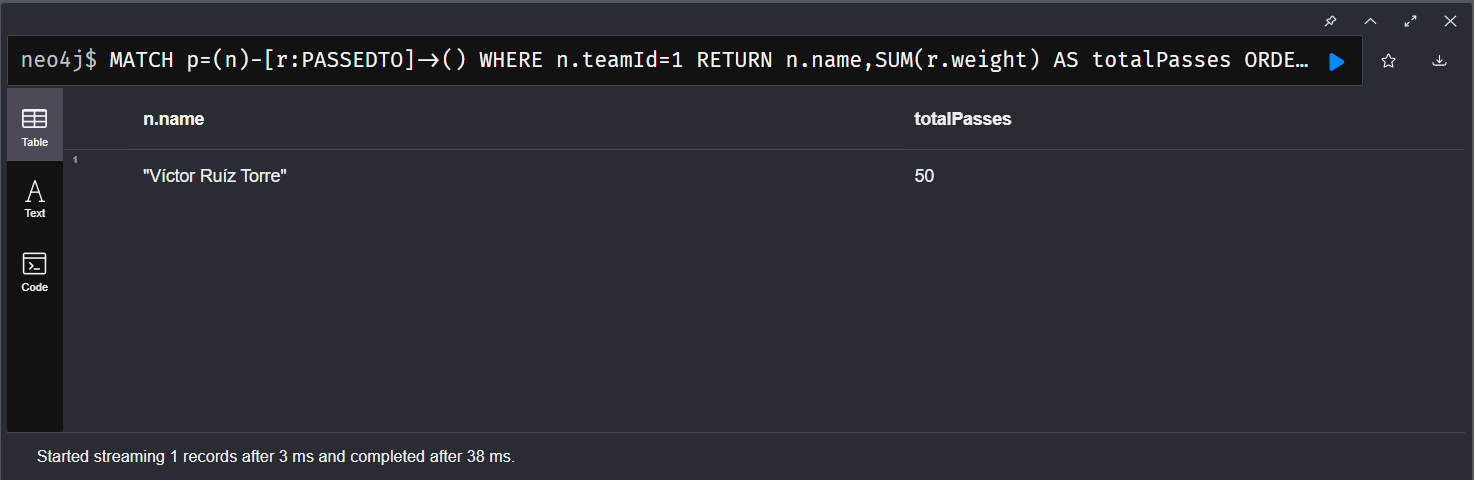

<u>Retrieving the most active player from team two</u>

This is achived by summing the weight of each player in team two, ordering the resultant data in descending order and displaying only one player, that being the player with the highest total passes.

<u>Cypher Query</u>

**MATCH p=(n)-[r:PASSEDTO]->() WHERE n.teamId=2 RETURN n.name,SUM(r.weight) AS totalPasses ORDER BY totalPasses DESC LIMIT 1**

<u>Results:</u>

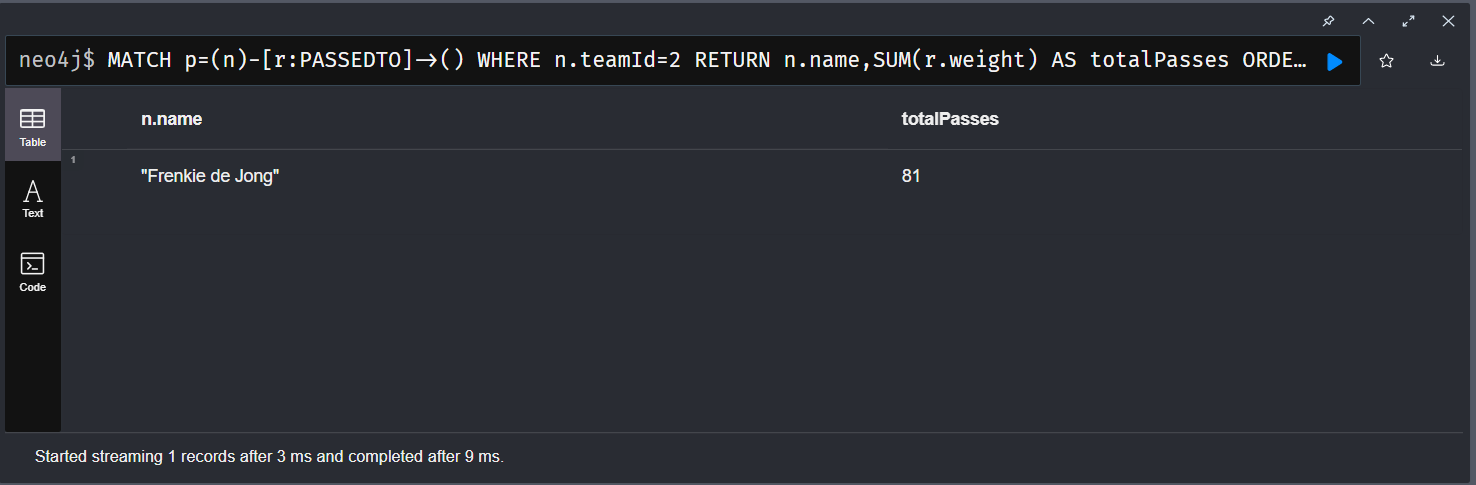

#### 3.2 Which players have an intermediary role (list the top 3 per team)? (10 marks)

<u>Retrieving the top three players which have an intermediary role in team one.</u>

This is achived by summing the total number of passes given and recieved for each player and then ordering the returned 
list of players in descending order and displaying the top three. 

<u>Cypher Query</u>

**CALL {<br>
MATCH (n:Player)-[r:PASSEDTO]->(m:Player)<br>
WHERE n.teamId=1<br>
WITH n, sum(r.weight) AS playerWeight<br>
ORDER BY playerWeight DESC<br>
RETURN collect(n.name) AS MostActivePlayer, playerWeight AS NumberOfPasses<br>
UNION ALL<br>
MATCH (n:Player)-[r:PASSEDTO]->(m:Player)<br>
WHERE n.teamId=1<br>
WITH m, sum(r.weight) AS playerWeight<br>
ORDER BY playerWeight DESC<br>
RETURN collect(m.name) AS MostActivePlayer, playerWeight AS NumberOfPasses<br>
}<br>
RETURN MostActivePlayer, sum(NumberOfPasses) AS totalPasses<br>
ORDER BY totalPasses DESC<br>
LIMIT 3**

<u>Results:</u>

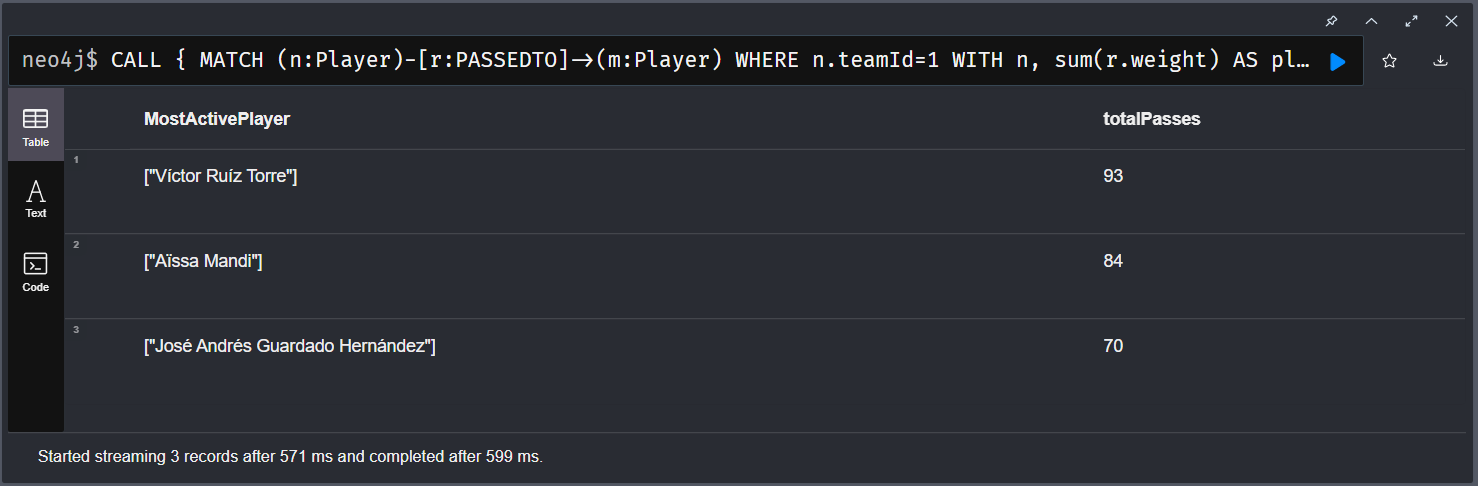

<u>Retrieving the top three players which have an intermediary role in team two.</u>

This is achived by summing the total number of passes given and recieved for each player and then ordering the returned 
list of players in descending order and displaying the top three. 

<u>Cypher Query</u>

**CALL {<br>
MATCH (n:Player)-[r:PASSEDTO]->(m:Player)<br>
WHERE n.teamId=2<br>
WITH n, sum(r.weight) AS playerWeight<br>
ORDER BY playerWeight DESC<br>
RETURN collect(n.name) AS MostActivePlayer, playerWeight AS NumberOfPasses<br>
UNION ALL<br>
MATCH (n:Player)-[r:PASSEDTO]->(m:Player)<br>
WHERE n.teamId=2<br>
WITH m, sum(r.weight) AS playerWeight<br>
ORDER BY playerWeight DESC<br>
RETURN collect(m.name) AS MostActivePlayer, playerWeight AS NumberOfPasses<br>
}<br>
RETURN MostActivePlayer, sum(NumberOfPasses) AS totalPasses<br>
ORDER BY totalPasses DESC<br>
LIMIT 3**

<u>Results:</u>

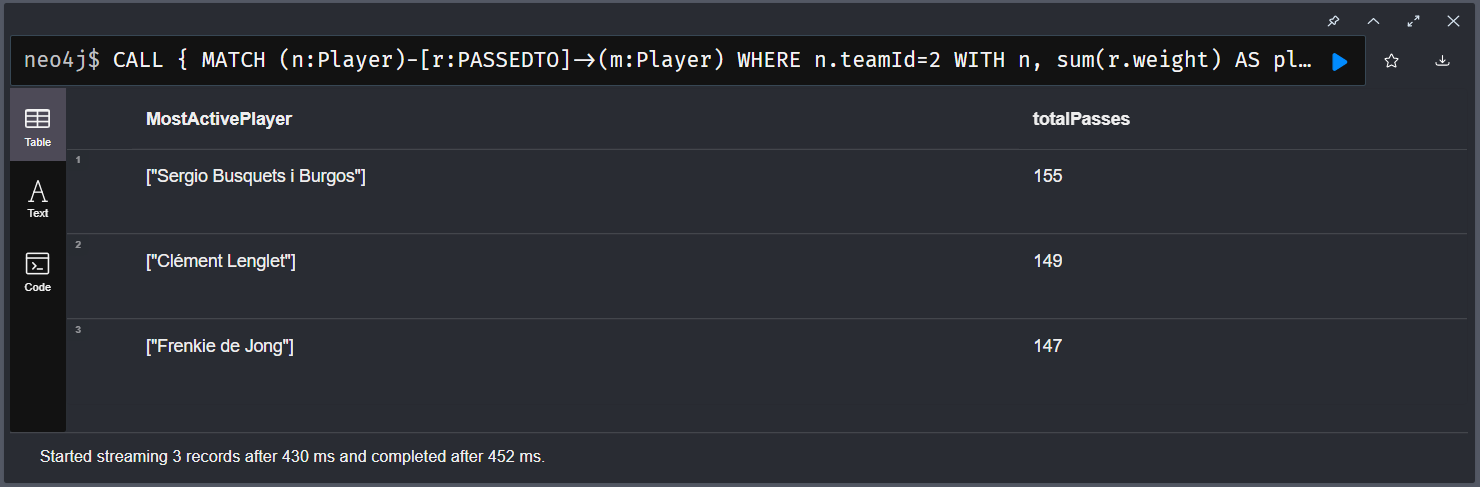

#### 3.3 How central is a player? (10 marks)

<u>Retrieving the list of players in conjunction with their level of centrality for team one.</u>

This is achived by summing the total number of relations that a player has with other players on the field. The more players that pass to or recievie a pass from the player in qeustion form a relation and the number of different relations determines a players centrality.  

<u>Cypher Query</u>

**CALL {<br>
MATCH (n:Player)-[r:PASSEDTO]->(m:Player)<br>
WHERE n.teamId=1<br>
WITH n, count(r) AS playerWeight<br>
ORDER BY playerWeight DESC<br>
RETURN n.name AS MostCentralPlayer, playerWeight AS totalInteractions<br>
UNION ALL<br>
MATCH (n:Player)-[r:PASSEDTO]->(m:Player)<br>
WHERE n.teamId=1<br>
WITH m, count(r) AS playerWeight<br>
ORDER BY playerWeight DESC<br>
RETURN m.name AS MostCentralPlayer, playerWeight AS totalInteractions<br>
}<br>
RETURN MostCentralPlayer, sum(totalInteractions) AS totalInteractions<br>
ORDER BY totalInteractions DESC**<br>

<u>Results:</u>

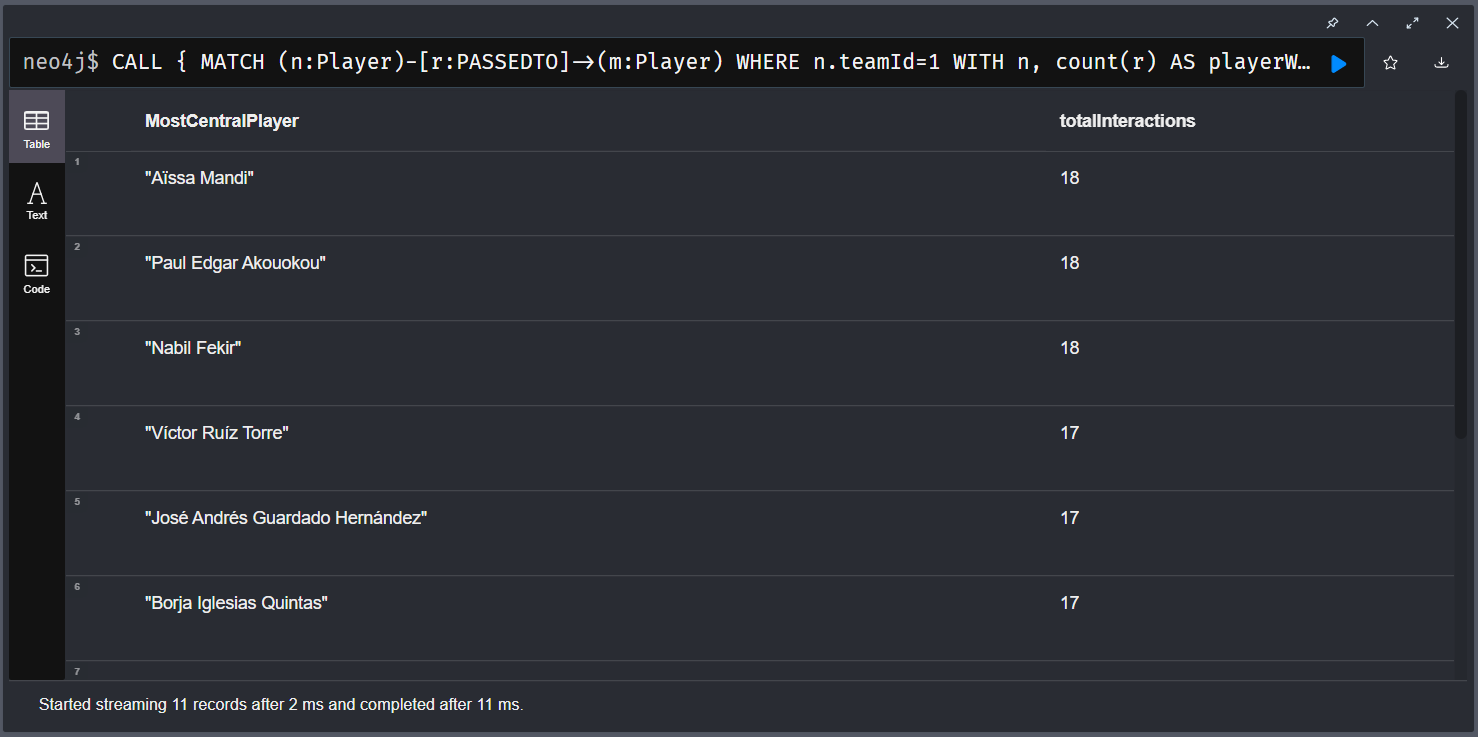

<u>Retrieving the list of players in conjunction with their level of centrality for team two.</u>

This is achived by summing the total number of relations that a player has with other players on the field. The more players that pass to or recievie a pass from the player in qeustion form a relation and the number of different relations determines a players centrality.  

<u>Cypher Query</u>

**CALL {<br>
MATCH (n:Player)-[r:PASSEDTO]->(m:Player)<br>
WHERE n.teamId=2<br>
WITH n, count(r) AS playerWeight<br>
ORDER BY playerWeight DESC<br>
RETURN n.name AS MostCentralPlayer, playerWeight AS totalInteractions<br>
UNION ALL<br>
MATCH (n:Player)-[r:PASSEDTO]->(m:Player)<br>
WHERE n.teamId=3<br>
WITH m, count(r) AS playerWeight<br>
ORDER BY playerWeight DESC<br>
RETURN m.name AS MostCentralPlayer, playerWeight AS totalInteractions<br>
}<br>
RETURN MostCentralPlayer, sum(totalInteractions) AS totalInteractions<br>
ORDER BY totalInteractions DESC**<br>

<u>Results:</u>

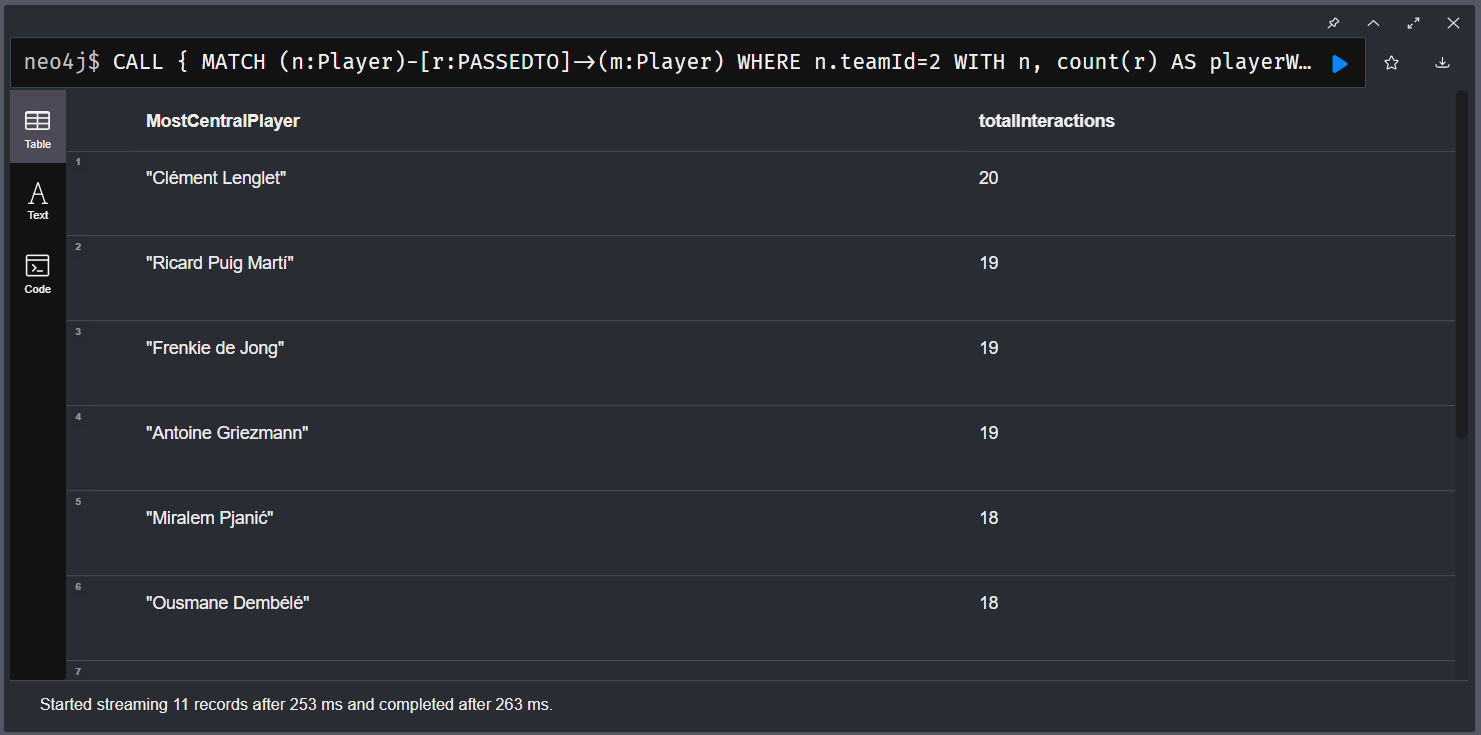

#### 3.4 Who is the player that received the highest number of passes? (10 marks)

<u>Retrieving the player that recieved the highest number of passes from team one.</u>

This is achived by summing the weight of each player in team one, ordering the resultant data in descending order and displaying only one player, that being the player with the highest total recieved passes

<u>Cypher Query</u>

**MATCH p=()-[r:PASSEDTO]->(n) WHERE n.teamId=1 RETURN n.name,SUM(r.weight) AS totalPasses ORDER BY totalPasses DESC LIMIT 1**

<u>Results:</u>

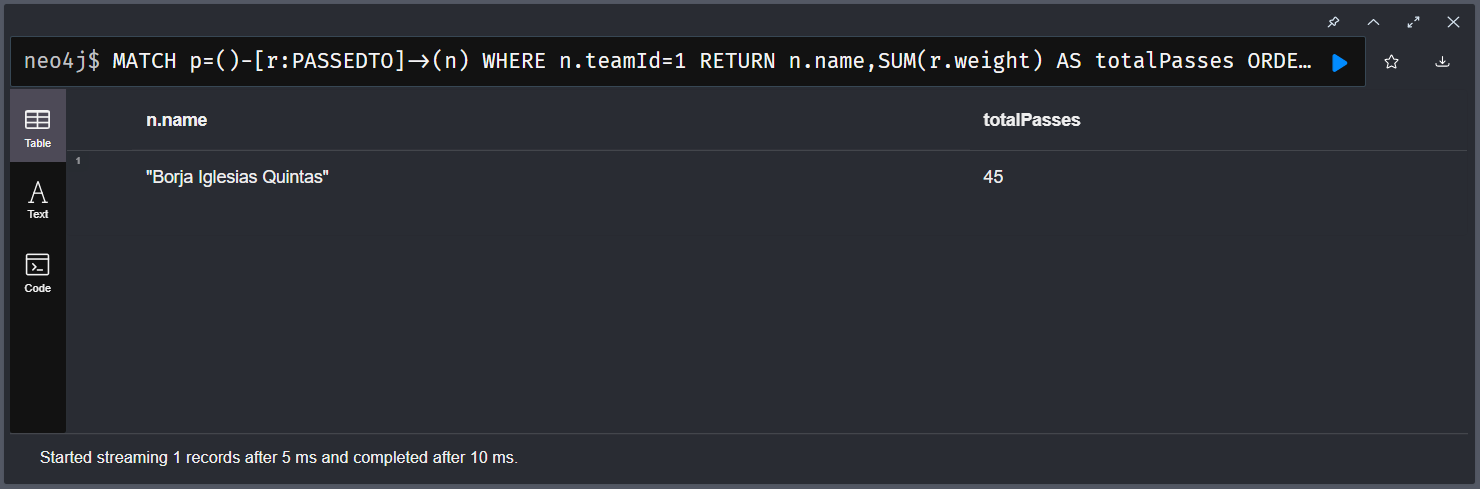

<u>Retrieving the player that recieved the highest number of passes from team two.</u>

This is achived by summing the weight of each player in team one, ordering the resultant data in descending order and displaying only one player, that being the player with the highest total recieved passes

<u>Cypher Query</u>

**MATCH p=()-[r:PASSEDTO]->(n) WHERE n.teamId=2 RETURN n.name,SUM(r.weight) AS totalPasses ORDER BY totalPasses DESC LIMIT 1**

<u>Results:</u>

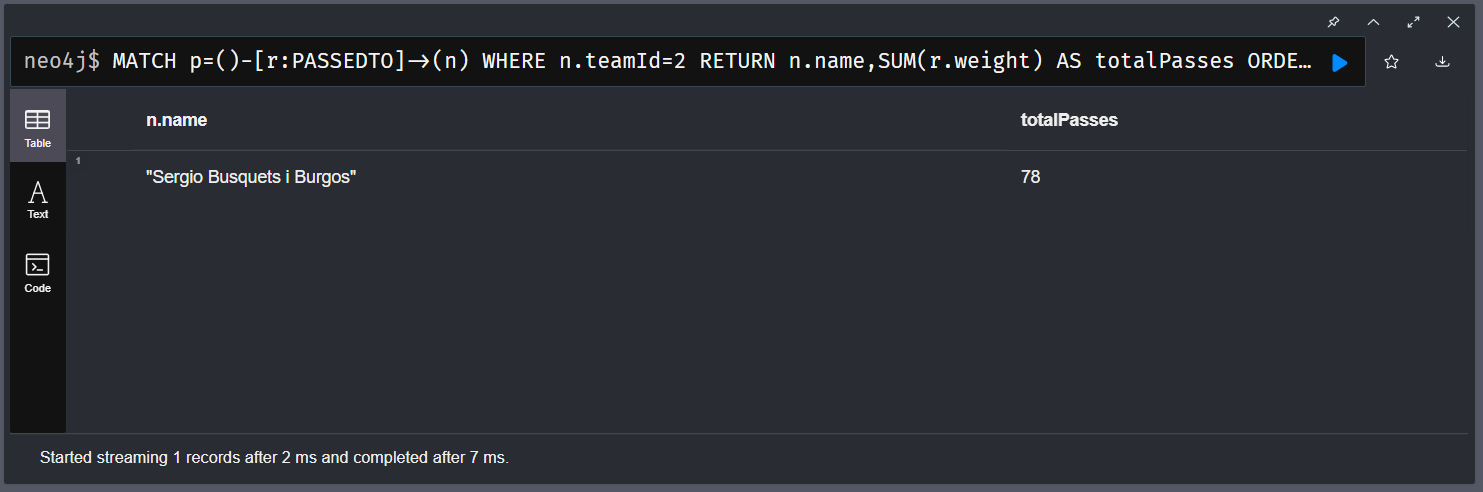